In [24]:
from keras.layers import Input, Dense
from keras.models import Model

In [25]:
encoding_dim =32

In [26]:
input_img = Input(shape=(784,)) # 28*28 for MNIST data

In [27]:
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

In [28]:
decoded = Dense(784, activation='sigmoid')(encoded)

In [29]:
autoencoder = Model(input_img, decoded)

In [30]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
# load data
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [32]:
# normalize all pixels 255
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# reshape to the required shape as input
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [33]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 784)               25872     
Total params: 136,688
Trainable params: 136,688
Non-trainable params: 0
_________________________________________________________________


In [34]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s - loss: 0.3438 - acc: 0.7470 - val_loss: 0.2643 - val_acc: 0.7915
Epoch 2/50
60000/60000 [==============================] - 1s - loss: 0.2553 - acc: 0.7950 - val_loss: 0.2425 - val_acc: 0.7936
Epoch 3/50
60000/60000 [==============================] - 1s - loss: 0.2305 - acc: 0.7941 - val_loss: 0.2176 - val_acc: 0.7947
Epoch 4/50
60000/60000 [==============================] - 1s - loss: 0.2093 - acc: 0.7957 - val_loss: 0.1991 - val_acc: 0.7962
Epoch 5/50
60000/60000 [==============================] - 1s - loss: 0.1953 - acc: 0.7972 - val_loss: 0.1892 - val_acc: 0.7980
Epoch 6/50
60000/60000 [==============================] - 2s - loss: 0.1859 - acc: 0.7990 - val_loss: 0.1797 - val_acc: 0.8005
Epoch 7/50
60000/60000 [==============================] - 2s - loss: 0.1769 - acc: 0.8008 - val_loss: 0.1717 - val_acc: 0.8003
Epoch 8/50
60000/60000 [==============================] - 2s 

In [35]:
encoder = Model(input_img, encoded)

In [36]:
# decoder = Model(encoded_ino, decoded)

encoded_input = Input(shape=(encoding_dim,))

In [37]:
encoded_input.shape

TensorShape([Dimension(None), Dimension(32)])

In [38]:
# get the last layer from autoencoder i.e decoder layer
decoder_layer = autoencoder.layers[-1]

In [39]:
# input = encoded input
# output = decoded(encoded input)

decoder = Model(encoded_input, decoder_layer(encoded_input))

In [40]:
encoded_images = encoder.predict(x_test)

In [41]:
encoded_images

array([[ 25.3190136 ,   7.66122866,  19.09629631, ...,  16.28502846,
          5.87739325,   0.        ],
       [  7.62991285,  24.11292458,  17.51410294, ...,  17.20057487,
         20.69262505,   0.        ],
       [ 12.26418781,   8.97395039,   6.17695236, ...,  11.30650425,
         26.36323738,   0.        ],
       ..., 
       [ 28.01749229,  14.86636639,  21.88395691, ...,   7.83109331,
         19.00192833,   0.        ],
       [ 18.76287651,  26.12579918,  20.06475067, ...,  11.92119217,
         10.67123795,   0.        ],
       [ 16.59347153,  26.84771729,  13.23494053, ...,  23.09669304,
         37.96303558,   0.        ]], dtype=float32)

In [42]:
decoded_images = decoder.predict(encoded_images)
decoded_images

array([[  5.67531000e-09,   1.03826011e-07,   9.48771117e-07, ...,
          1.14193696e-07,   2.10146618e-06,   2.29130981e-09],
       [  6.93138489e-08,   4.07016414e-05,   2.96069684e-05, ...,
          2.01085959e-06,   1.75466801e-06,   8.53475868e-09],
       [  3.38006004e-07,   1.07102125e-04,   6.60325395e-06, ...,
          5.42665779e-09,   8.41093140e-07,   7.73803333e-09],
       ..., 
       [  7.13302695e-10,   1.56276201e-08,   2.47503550e-07, ...,
          3.06259285e-09,   8.12463270e-07,   1.83106391e-10],
       [  1.63932619e-08,   1.58174043e-06,   1.99305014e-05, ...,
          1.48763120e-05,   6.21558593e-06,   8.30686417e-08],
       [  5.48008694e-10,   1.16172050e-08,   1.31063118e-07, ...,
          7.58625660e-08,   2.00574970e-08,   1.75146744e-10]], dtype=float32)

In [43]:
import matplotlib.pyplot as plt

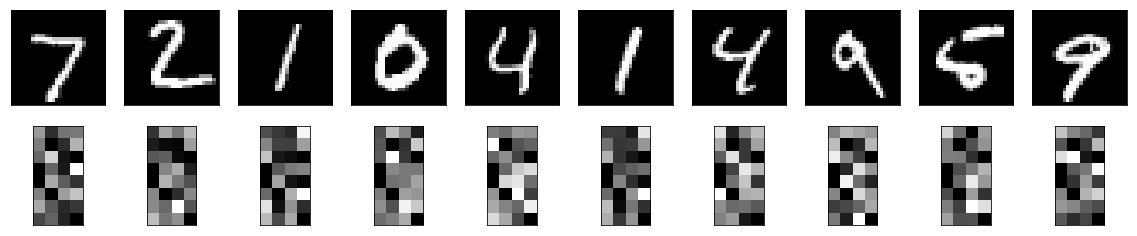

In [44]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display enoded images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_images[i].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

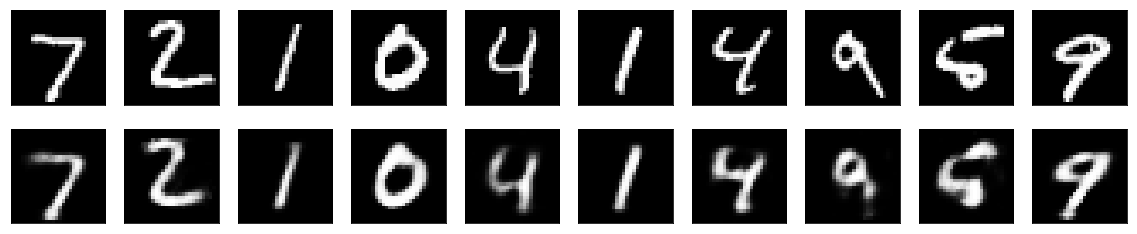

In [45]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()